In [35]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# pick f as a function of z
f_text = "log10(1/z)"
sym.sympify(f_text)

log10(1/z)

In [37]:
# make it symbolic
f = sym.sympify(f_text)

# replace f(z) by f(x+iy)
x, y = sym.symbols('x y', real=True)
f = f.subs('z', x+y*1j)

# Cauchy-Riemann Eqns
u = sym.re(f); v = sym.im(f)
ux = u.diff(x); vx = v.diff(x)
uy = u.diff(y); vy = v.diff(y)
uxEQvy = (ux-vy).simplify() == 0
uyEQnvx = (uy+vx).simplify() == 0

In [38]:
if uxEQvy:
    print("ux = vy")
else:
    print("ux != vy")
if uyEQnvx:
    print("uy = -vx")
else:
    print("uy != -vx")

if (not (uxEQvy and uyEQnvx)):
    raise Warning("Cauchy-Riemann Equations not satisfied")

ux = vy
uy = -vx


# Function Visualization

In [39]:
Xrange = [-2,2]
Yrange = [-2,2]
pts = np.meshgrid(np.linspace(*[*Xrange, 100]), np.linspace(*[*Yrange, 100]))
X=pts[0]
Y=pts[1]

fNumpy = sym.lambdify((x,y), f, "numpy")
fPts = fNumpy(X,Y)

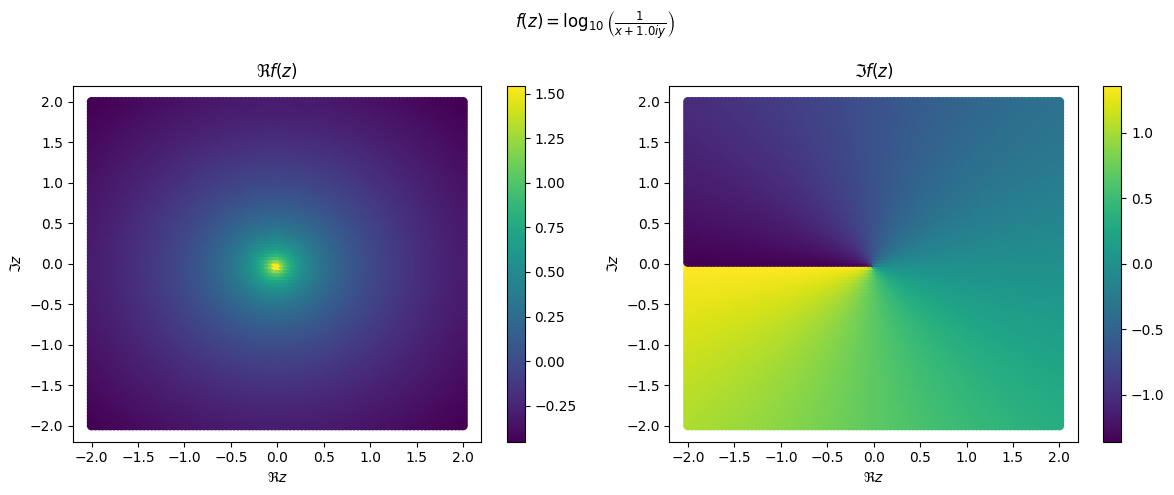

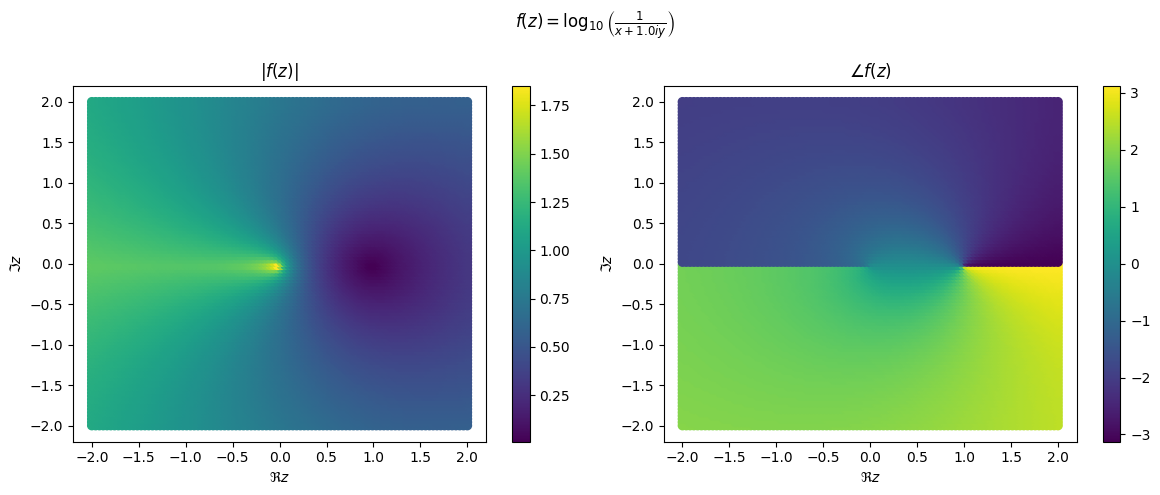

In [40]:
plt.figure(figsize=(12,5))
plt.suptitle("$f(z)="+sym.latex(f)+"$")
plt.subplot(1,2,1)
plt.scatter(X, Y, c=np.real(fPts))
plt.xlabel("$\Re z$"); plt.ylabel("$\Im z$")
plt.title("$\Re f(z)$")
plt.colorbar()

plt.subplot(1,2,2)
plt.scatter(X, Y, c=np.imag(fPts))
plt.xlabel("$\Re z$"); plt.ylabel("$\Im z$")
plt.title("$\Im f(z)$")
plt.colorbar()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))
plt.suptitle("$f(z)="+sym.latex(f)+"$")
plt.subplot(1,2,1)
plt.scatter(X, Y, c=np.abs(fPts))
plt.xlabel("$\Re z$"); plt.ylabel("$\Im z$")
plt.title("$|f(z)|$")
plt.colorbar()

plt.subplot(1,2,2)
plt.scatter(X, Y, c=np.angle(fPts))
plt.xlabel("$\Re z$"); plt.ylabel("$\Im z$")
plt.title("$\\angle f(z)$")
plt.colorbar()
plt.tight_layout()
plt.show()